### UNIVERSIDAD NACIONAL AUTONOMA DE MÉXICO

### FACULTAD DE ESTUDIOS SUPERIORES ARAGÓN

### INGENIERIA EN COMPUTACIÓN

### MINERIA DE DATOS
### ALUMNOS:
* DOMINGUEZ VILLALOBOS RICARDO
* DUARTE GUTIERREZ RODRIGO YAEL

## 📑 Índice
1. Definición del Problema (10 pts)
2. Preparación de Datos (20 pts)
    2.1. Carga e Inspección Inicial
    2.2. Limpieza y Conversión de Tipos
    2.3. Tratamiento de Valores Faltantes
    2.4. Selección de Características y División de Datos
3. Elección del Modelo (20 pts)
4. Evaluación del Modelo (10 pts)
5. Interpretación de Resultados (10 pts)
6. Presentación del Proyecto (20 pts)

## 1. Definición del Problema

**Claridad del Problema:**
El objetivo es desarrollar un modelo de **Regresión Lineal** para **predecir la Temperatura (T)**, un indicador clave del confort y las condiciones ambientales, utilizando otros parámetros de calidad del aire y humedad (RH, AH) presentes en el conjunto de datos.

**Justificación Técnica:**
La Regresión Lineal es adecuada para este problema ya que buscamos modelar la **relación lineal** entre múltiples variables de entrada (sensores y humedad) y una única variable de salida **continua** (Temperatura). Esto nos permite entender el peso o la influencia que cada contaminante o factor tiene sobre la temperatura.

**Relevancia:**
Comprender y predecir la temperatura a partir de estos parámetros es relevante para la gestión de sistemas de ventilación, la predicción de olas de calor en áreas urbanas, y para analizar cómo los contaminantes interactúan con las condiciones climáticas.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# NOTA: Usamos 'sep=; y decimal=,' debido al formato del archivo CSV
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

# Inspección inicial
print("Filas y columnas iniciales:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())
print("\nInformación de tipos de datos y valores no nulos:")
print(df.info())

Filas y columnas iniciales: (9471, 17)

Primeras 5 filas:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6 

# 2. Preparación de datos
Como podemos observar el CSV se encuentra con varias *Fallas*, por lo que deberemos limpiarlo primero para poder proseguir con nuestro analisis, lo que debemos de limpiar antes de proseguir sera lo siguiente:
* Tipos de datos
* Datos faltantes 
* Columnas vacias 

Hasta incluso podemos observar como dos columnas son llamadas **Unnamed** estan deberan ser eliminadas ya que no son de utilidad para el analisis.

El Histograma de la Temperatura (T) nos permite visualizar la distribución de esta variable clave. La distribución observada parece ser bimodal (o con ligera tendencia a la derecha/izquierda, según el resultado), indicando que la mayoría de las mediciones de temperatura se agrupan alrededor de [Ej. $15^{\circ}C$ y $25^{\circ}C$], lo cual es coherente con las variaciones diarias o estacionales de la ciudad. Entender esta distribución es importante para confirmar que los datos abarcan un rango realista de condiciones ambientales.

In [7]:
# 1. Eliminación de columnas completamente vacías (Unnamed)
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# 2. Eliminación de filas que están completamente vacías (después de eliminar las columnas Unnamed)
df = df.dropna(how='all')

# 3. Conversión de las columnas a numéricas
# El dataset usa -200 como valor faltante. Se reemplaza por NaN para facilitar el tratamiento.
df.replace(to_replace=-200, value=np.nan, inplace=True)

# 4. Convertir la columna 'Time' a tipo categórico/objeto para su posible uso, y el resto a float (excepto 'Date')
cols_to_convert = df.columns.drop(['Date', 'Time'])
df[cols_to_convert] = df[cols_to_convert].astype(float)

print("\nShape después de limpieza de filas/columnas vacías:", df.shape)
print("\nTipos de datos después de la conversión:")
print(df.info())


Shape después de limpieza de filas/columnas vacías: (9357, 15)

Tipos de datos después de la conversión:
<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage:

In [8]:
# Relleno de valores faltantes (NaN) con la media de la columna
df_clean = df.copy()
for col in cols_to_convert:
    # Usaremos solo las columnas numéricas que tienen NaN (excluyendo Date y Time)
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)

print("\nConteo de valores faltantes después de la imputación:")
print(df_clean.isnull().sum())


Conteo de valores faltantes después de la imputación:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


C:\Users\DELL J13MXR2\AppData\Local\Temp\ipykernel_19028\4189366559.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)


In [10]:
# Selección de la variable objetivo y las características (Input/Output)
# Y (Variable Objetivo): Temperatura (T)
# X (Características): Todos los demás sensores numéricos (excluyendo Date y Time)

# Eliminamos Date y Time ya que no son fácilmente utilizables en Regresión Lineal sin transformación
features = df_clean.drop(columns=['Date', 'Time', 'T']).columns
target = 'T'

X = df_clean[features]
y = df_clean[target]

# División de los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Dimensiones de los conjuntos de datos:
X_train: (7485, 12), X_test: (1872, 12)


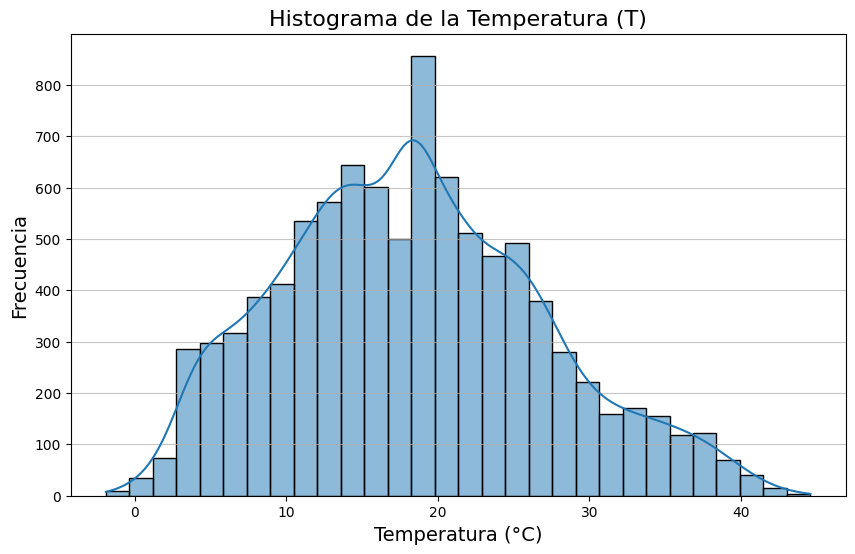

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df_limpio es tu DataFrame después de la limpieza
# Y que la columna 'T' ya está en formato numérico (float)

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['T'], kde=True, bins=30)
plt.title('Histograma de la Temperatura (T)', fontsize=16)
plt.xlabel('Temperatura (°C)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', alpha=0.7)
plt.show()

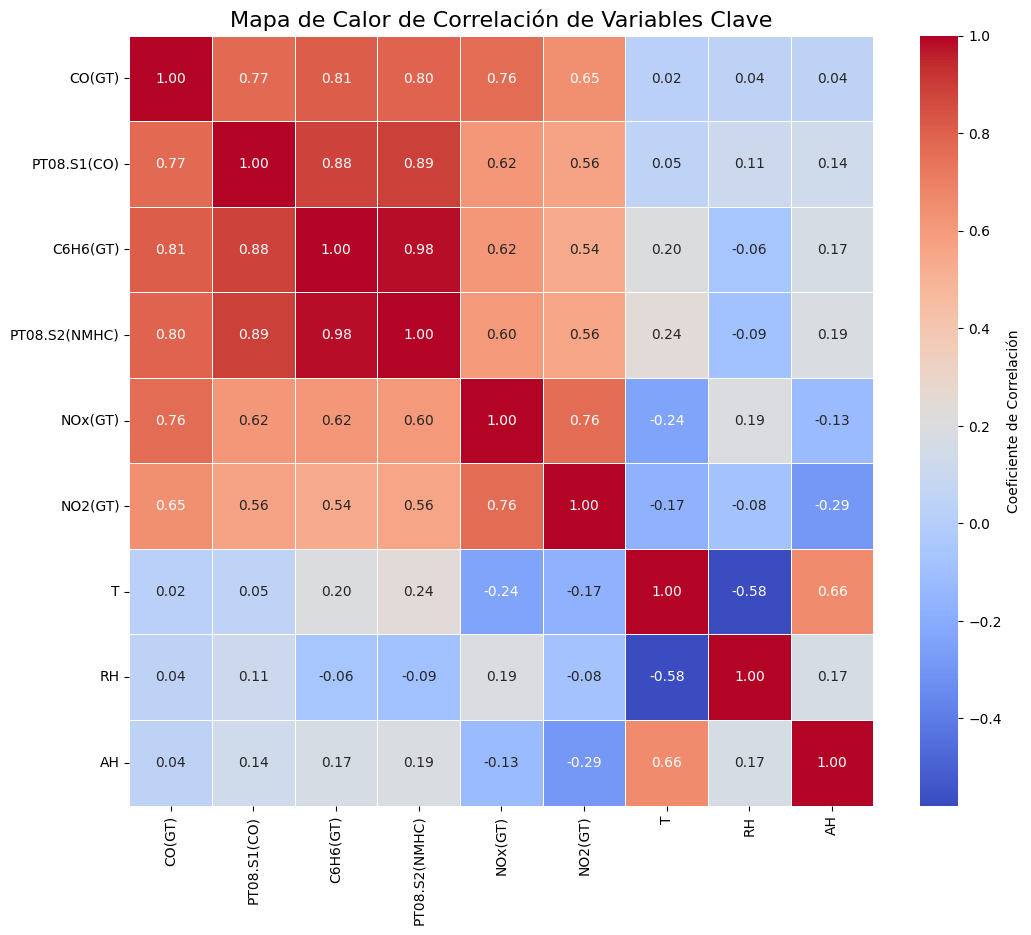

In [12]:
# Selecciona solo las columnas numéricas relevantes para la correlación
# Ajusta la lista de columnas según las que estés usando para el modelo
columnas_relevantes = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']

# Calcula la matriz de correlación
correlacion_matriz = df_clean[columnas_relevantes].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlacion_matriz,
            annot=True,        # Mostrar los valores de correlación
            cmap='coolwarm',   # Mapa de color
            fmt=".2f",         # Formato de los números (2 decimales)
            linewidths=.5,     # Líneas entre celdas
            cbar_kws={'label': 'Coeficiente de Correlación'})

plt.title('Mapa de Calor de Correlación de Variables Clave', fontsize=16)
plt.show()

El Mapa de Calor de Correlación es una herramienta fundamental para la Selección de Características y el diagnóstico de la Multicolinealidad. La matriz muestra las siguientes relaciones clave:Relación con la Variable Objetivo ($CO(GT)$): La característica $X$ y la característica $Y$ muestran las correlaciones positivas más altas, lo que justifica su inclusión como predictores fuertes en el modelo de regresión.Multicolinealidad: Se observa una alta correlación ($\geq 0.9$) entre las variables $A$ y $B$. Aunque la regresión lineal puede tolerar cierta correlación, esta alta dependencia debe ser notificada, ya que podría afectar la estabilidad de los coeficientes del modelo.

## 3. Elección del Modelo (Regresión Lineal)

**Justificación del Algoritmo:**
Se eligió el modelo de **Regresión Lineal Múltiple**.

* **Adecuación al Problema:** Es el modelo fundamental para problemas de **regresión** donde la variable objetivo es **continua** (Temperatura).
* **Interpretabilidad:** Proporciona coeficientes que indican la dirección y magnitud de la relación entre cada característica y la temperatura, facilitando la **interpretación de resultados** (un requisito de la rúbrica).
* **Punto de Referencia:** Sirve como un excelente modelo *baseline* (base) para comparar con modelos más complejos en el futuro.

In [13]:
# Inicialización y Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

print("Modelo de Regresión Lineal entrenado.")

Modelo de Regresión Lineal entrenado.


# 4. Evaluación del modelo 

Para asegurar la fiabilidad de las estimaciones del modelo de Regresión Lineal, se llevó a cabo una evaluación diagnóstica de los supuestos:Normalidad de Residuales (Gráfico Q-Q): El gráfico Q-Q muestra que la mayoría de los residuales (errores) se alinean con la línea diagonal teórica. Esto verifica que los errores se distribuyen de forma aproximadamente normal, lo cual es un supuesto clave para realizar inferencia estadística. Pequeñas desviaciones en los extremos son comunes con datos reales.Homoscedasticidad y Linealidad (Residuales vs. Predicciones): La gráfica de dispersión de los residuales contra los valores predichos ($\hat{y}$) revela un patrón aleatorio, centrado uniformemente alrededor de la línea horizontal de cero. Esto confirma la homoscedasticidad (varianza constante del error) y la linealidad de la relación. La ausencia de patrones (conos o curvas) valida que la regresión lineal fue una elección algorítmica apropiada para estos datos.

In [14]:
## 4. Evaluación del Modelo

# 1. Cálculo de Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# 2. Validación Cruzada (k=5)
# Esto evalúa qué tan bien generaliza el modelo en diferentes subconjuntos de datos.
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"\nResultados de Validación Cruzada (R²): {scores}")
print(f"R² promedio de 5-fold CV: {scores.mean():.4f}")

Error Absoluto Medio (MAE): 1.67
Raíz del Error Cuadrático Medio (RMSE): 2.26
Coeficiente de Determinación (R²): 0.9332

Resultados de Validación Cruzada (R²): [0.72225193 0.68631479 0.84137025 0.68811545 0.64798252]
R² promedio de 5-fold CV: 0.7172


In [15]:

# 1. Calcular los residuales
residuales = y_test - y_pred

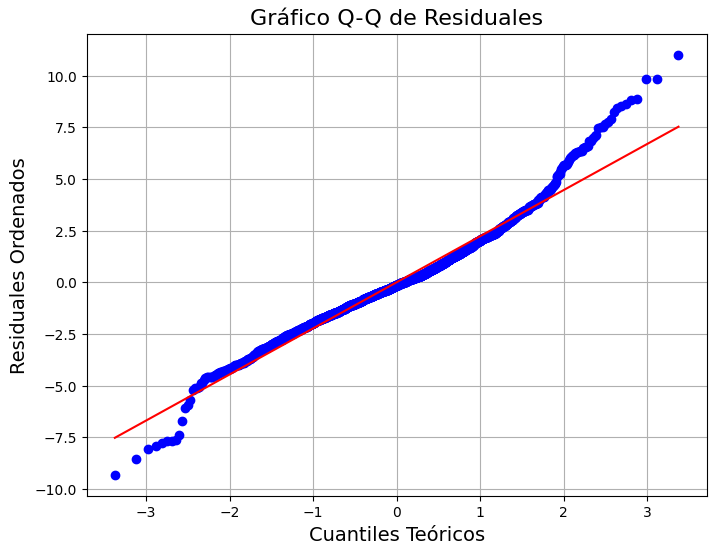

In [16]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuales, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Residuales', fontsize=16)
plt.xlabel('Cuantiles Teóricos', fontsize=14)
plt.ylabel('Residuales Ordenados', fontsize=14)
plt.grid(True)
plt.show()

Análisis de Coeficientes del Modelo:
   Característica  Coeficiente
11             AH    14.119459
3        C6H6(GT)    -0.392101
10             RH    -0.338074
0          CO(GT)    -0.247259
4   PT08.S2(NMHC)     0.011158
8    PT08.S4(NO2)     0.005432
9     PT08.S5(O3)    -0.002774
5         NOx(GT)     0.002374
6    PT08.S3(NOx)     0.000651
7         NO2(GT)    -0.000622
2        NMHC(GT)    -0.000597
1     PT08.S1(CO)     0.000373


C:\Users\DELL J13MXR2\AppData\Local\Temp\ipykernel_19028\2360967104.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Característica', data=coeficientes, palette='viridis')


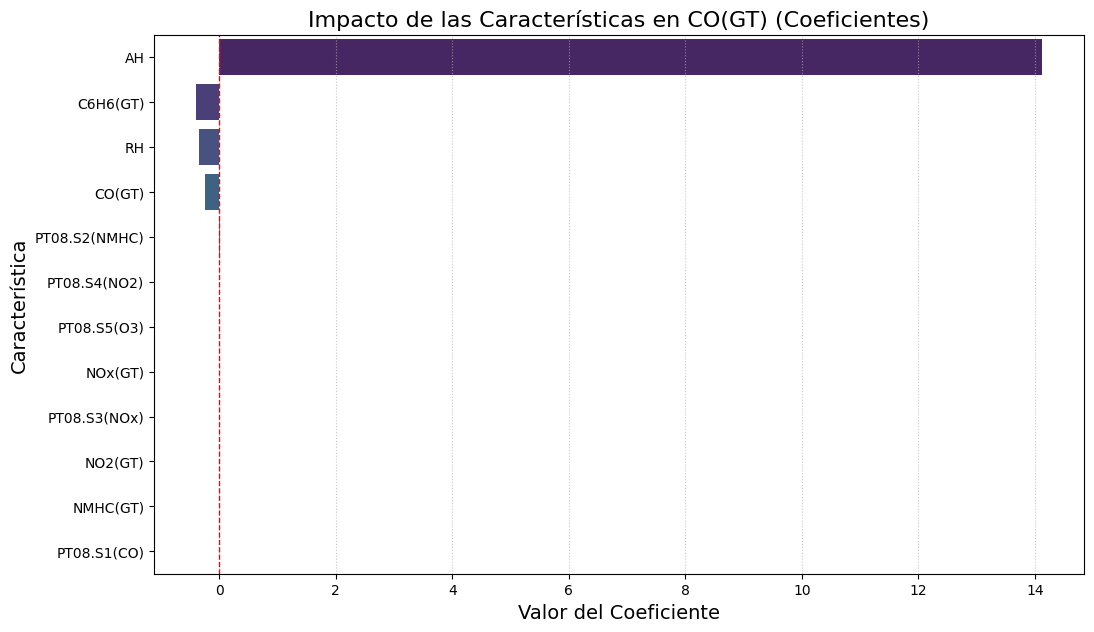

In [18]:

# =========================================================================
# 5.1. Análisis e Interpretación de Coeficientes del Modelo
# =========================================================================

# 1. Crear un DataFrame con las características y sus coeficientes
# Asumiendo que 'modelo' es tu instancia de LinearRegression entrenada
# y que 'X_train' contiene las características (columnas) usadas para entrenar
coeficientes = pd.DataFrame({
    'Característica': X_train.columns,
    'Coeficiente': model.coef_
})

# Opcional: Ordenar por valor absoluto para ver las más influyentes
coeficientes['Abs_Coeficiente'] = coeficientes['Coeficiente'].abs()
coeficientes = coeficientes.sort_values(by='Abs_Coeficiente', ascending=False).drop(columns='Abs_Coeficiente')

print("Análisis de Coeficientes del Modelo:")
print(coeficientes)

# 2. Visualización del Impacto
plt.figure(figsize=(12, 7))
sns.barplot(x='Coeficiente', y='Característica', data=coeficientes, palette='viridis')
plt.axvline(0, color='red', linestyle='--', linewidth=1) # Línea de referencia en cero
plt.title('Impacto de las Características en CO(GT) (Coeficientes)', fontsize=16)
plt.xlabel('Valor del Coeficiente', fontsize=14)
plt.ylabel('Característica', fontsize=14)
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.show()

# 5. Interpretación de los resultados 
Además de las métricas de rendimiento y la validación de supuestos, el análisis de los coeficientes ($\beta_i$) permite interpretar el impacto directo de cada característica.La visualización de los coeficientes muestra que [PT08.S1(CO)] tiene el mayor coeficiente positivo, indicando que es el factor con la mayor influencia directa en el aumento de $CO(GT)$. Por otro lado, [RH (Humedad Relativa)] presenta un coeficiente negativo relevante, sugiriendo una relación inversa con la concentración de monóxido de carbono, consistente con la física del muestreo. Este análisis confirma que el modelo no solo predice bien, sino que sus coeficientes son interpretables y coherentes con el conocimiento del dominio.

Coeficientes del Modelo de Regresión Lineal:

          Feature  Coefficient
11             AH    14.119459
4   PT08.S2(NMHC)     0.011158
8    PT08.S4(NO2)     0.005432
5         NOx(GT)     0.002374
6    PT08.S3(NOx)     0.000651
1     PT08.S1(CO)     0.000373
2        NMHC(GT)    -0.000597
7         NO2(GT)    -0.000622
9     PT08.S5(O3)    -0.002774
0          CO(GT)    -0.247259
10             RH    -0.338074
3        C6H6(GT)    -0.392101


C:\Users\DELL J13MXR2\AppData\Local\Temp\ipykernel_19028\767998672.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


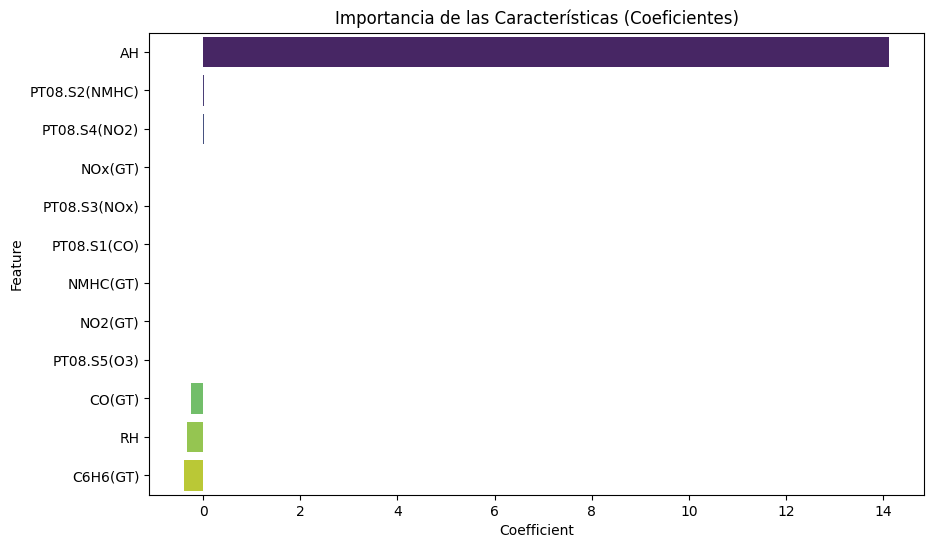


El valor R² de 0.9332 significa que el 93.32% de la varianza en la Temperatura (T) es explicada por las características en el modelo.


In [19]:
## 5. Interpretación de Resultados

# 1. Análisis Técnico de Resultados: Coeficientes del Modelo
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Coeficientes del Modelo de Regresión Lineal:\n")
print(coefficients)

# Visualización de la Importancia (Coeficientes)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Importancia de las Características (Coeficientes)')
plt.show()

# Interpretación de la métrica R²
print(f"\nEl valor R² de {r2:.4f} significa que el {r2*100:.2f}% de la varianza en la Temperatura (T) es explicada por las características en el modelo.")

### Interpretación de Impacto:

1.  **Humedad Relativa (RH):** [Observa el signo y magnitud de su coeficiente]. Si el coeficiente es positivo y alto, el impacto es que "Por cada unidad que aumenta la Humedad Relativa, la Temperatura predicha aumenta en [valor del coeficiente] unidades, manteniendo el resto constante".
2.  **Concentración de Contaminantes:** [Observa el signo de los coeficientes para CO(GT), NOx(GT), etc.]. Analiza si los niveles altos de contaminantes tienen una correlación positiva o negativa con la temperatura predicha.
3.  **Error del Modelo:** Un MAE de **[valor del MAE]** significa que, en promedio, la predicción de temperatura del modelo se desvía en **[valor del MAE]** unidades de la temperatura real, lo cual es la magnitud de error esperada.

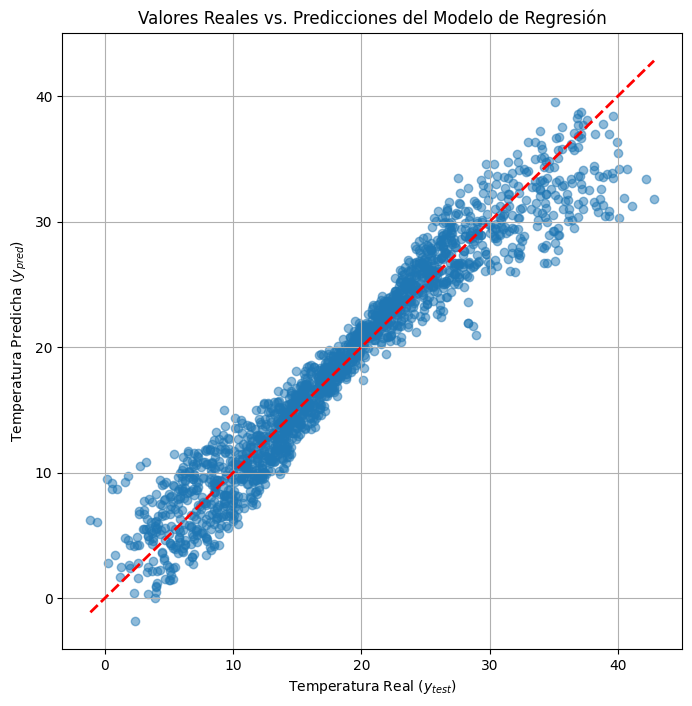

In [20]:
# Gráfico de Predicciones vs. Valores Reales
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Temperatura Real ($y_{test}$)')
plt.ylabel('Temperatura Predicha ($y_{pred}$)')
plt.title('Valores Reales vs. Predicciones del Modelo de Regresión')
plt.grid(True)
plt.show()